In [1]:
%load_ext pretty_jupyter

In [2]:
# Import Notebook Libraries
from plotly.offline import plot
import pandas as pd
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import plotly.io
from pretty_jupyter.helpers import matplotlib_fig_to_html
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
plotly.io.renderers.default = 'notebook_connected'

In [128]:
%%jmd 

# Introduction
Live streaming is reshaping entertainment, and Twitch is at its epicenter. This project examines the top 1000 Twitch streamers' data from the past year to decipher what draws and keeps viewers engaged. By studying streamer activity, viewer counts, and engagement metrics, we seek to pinpoint what boosts a streamer's popularity. Our findings aim to offer actionable insights for streamers looking to grow their audience and for anyone interested in the dynamics of online streaming success.
&nbsp;
<div style="text-align: center;">
    <img src="twitch-banner.png" width="600"/>
</div>


## Project Overview
This projects aims to analyze Twitch data consisting of the top 1000 Streamers from the past year to understand viewer preferences and factors influencing engagement and popularity on the platform.

### Setup
#### Import Required Libraries
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
```

#### Load Data 

```python
# Load the dataset
twitch_data = pd.read_csv('twitchdata-update.csv')
# Display the first few rows of the dataset
twitch_data.head()
```



# Introduction
Live streaming is reshaping entertainment, and Twitch is at its epicenter. This project examines the top 1000 Twitch streamers' data from the past year to decipher what draws and keeps viewers engaged. By studying streamer activity, viewer counts, and engagement metrics, we seek to pinpoint what boosts a streamer's popularity. Our findings aim to offer actionable insights for streamers looking to grow their audience and for anyone interested in the dynamics of online streaming success.
&nbsp;
<div style="text-align: center;">
    <img src="twitch-banner.png" width="600"/>
</div>


## Project Overview
This projects aims to analyze Twitch data consisting of the top 1000 Streamers from the past year to understand viewer preferences and factors influencing engagement and popularity on the platform.

### Setup
#### Import Required Libraries
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
```

#### Load Data 

```python
# Load the dataset
twitch_data = pd.read_csv('twitchdata-update.csv')
# Display the first few rows of the dataset
twitch_data.head()
```

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Load the dataset
twitch_data = pd.read_csv('twitchdata-update.csv')

# Display the first few rows of the dataset
twitch_data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [92]:
%%jmd

___

# Exploratory Data Analysis (EDA)

## Data Structure and Cleaning
Preliminary examination of the data to understand its structure and to identify obvious data quality issues that need to be addressed immediately.
```python
# Display the shape of the dataset
print("Dataset shape:", twitch_data.shape)

# Summary statistics
display(twitch_data.describe())

# Data types and missing values
display(twitch_data.info())
```


___

# Exploratory Data Analysis (EDA)

## Data Structure and Cleaning
Preliminary examination of the data to understand its structure and to identify obvious data quality issues that need to be addressed immediately.
```python
# Display the shape of the dataset
print("Dataset shape:", twitch_data.shape)

# Summary statistics
display(twitch_data.describe())

# Data types and missing values
display(twitch_data.info())
```

In [41]:
# Display the shape of the dataset
print("Dataset shape:", twitch_data.shape)

# Data types and missing values
display(twitch_data.info())

# Summary statistics
display(twitch_data.describe())


Dataset shape: (1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


None

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [51]:
%%jmd 

### Structure
- **Diverse Watch Times**: Viewer engagement varies significantly among Twitch channels, indicated by the wide range of watch times and large standard deviation.
  
- **Streaming Duration Disparity**: There's a considerable disparity in how much content channels stream, with the data showing a broad spread in streaming times.

- **High Peak Viewership Variance**: Peak viewership figures vary dramatically, with a small number of streams achieving exceptionally high peak viewer numbers, likely driving up the average.

- **Variable Viewer Engagement**: Average viewers per channel span a wide range, suggesting varied levels of consistent engagement across channels.

- **Wide Range of Followers**: There's a substantial range in the number of followers per channel, from a few thousand to several million.

- **Inconsistent Follower Growth**: Channels show varied follower growth, with most gaining followers but some showing a decrease, highlighted by a negative minimum value.

- **Vast Differences in Views Gained**: Similar to followers, the range of views gained by channels is extensive, suggesting a mix of moderately watched content and viral hits.

These points suggest that the streaming trends on Twitch are highly diverse, with certain channels achieving outlier levels of success. The variability in followers and views gained points to the potential for further investigation into what influences growth and viewership on Twitch. The negative values in `Followers gained` suggest that some channels might be losing popularity, which could be an interesting avenue for further analysis, especially in relation to stream time and content strategy.



### Structure
- **Diverse Watch Times**: Viewer engagement varies significantly among Twitch channels, indicated by the wide range of watch times and large standard deviation.
  
- **Streaming Duration Disparity**: There's a considerable disparity in how much content channels stream, with the data showing a broad spread in streaming times.

- **High Peak Viewership Variance**: Peak viewership figures vary dramatically, with a small number of streams achieving exceptionally high peak viewer numbers, likely driving up the average.

- **Variable Viewer Engagement**: Average viewers per channel span a wide range, suggesting varied levels of consistent engagement across channels.

- **Wide Range of Followers**: There's a substantial range in the number of followers per channel, from a few thousand to several million.

- **Inconsistent Follower Growth**: Channels show varied follower growth, with most gaining followers but some showing a decrease, highlighted by a negative minimum value.

- **Vast Differences in Views Gained**: Similar to followers, the range of views gained by channels is extensive, suggesting a mix of moderately watched content and viral hits.

These points suggest that the streaming trends on Twitch are highly diverse, with certain channels achieving outlier levels of success. The variability in followers and views gained points to the potential for further investigation into what influences growth and viewership on Twitch. The negative values in `Followers gained` suggest that some channels might be losing popularity, which could be an interesting avenue for further analysis, especially in relation to stream time and content strategy.

In [41]:
%%jmd

### Cleaning
1. Confirming if zeros in the data are placeholders for missing information.
```python
# Check for any zero values that might represent missing data
zero_values_check = (twitch_data == 0).sum()
print(zero_values_check)
```


### Cleaning
1. Confirming if zeros in the data are placeholders for missing information.
```python
# Check for any zero values that might represent missing data
zero_values_check = (twitch_data == 0).sum()
print(zero_values_check)
```

In [40]:
# Check for any zero values that might represent missing data
zero_values_check = (twitch_data == 0).sum()
print(zero_values_check)

Channel                   0
Watch time(Minutes)       0
Stream time(minutes)      0
Peak viewers              0
Average viewers           0
Followers                 0
Followers gained          0
Views gained              0
Partnered                22
Mature                  770
Language                  0
dtype: int64


In [43]:
%%jmd

2. Investigating the negative values in `Followers gained` to determine how to handle them.
```python
# Investigate negative 'Followers gained' entries
negative_followers = twitch_data[twitch_data['Followers gained'] < 0]
print(negative_followers)
```


2. Investigating the negative values in `Followers gained` to determine how to handle them.
```python
# Investigate negative 'Followers gained' entries
negative_followers = twitch_data[twitch_data['Followers gained'] < 0]
print(negative_followers)
```

In [39]:
# Investigate negative 'Followers gained' entries
negative_followers = twitch_data[twitch_data['Followers gained'] < 0]
print(negative_followers)


            Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
499            Amaz            235255500                 84525         12652   
656   TSM_TheOddOne            181908120                188445          4363   
997  마스카 (newmasca)            122452320                217410          6431   

     Average viewers  Followers  Followers gained  Views gained  Partnered  \
499             2764     915023             -5405       4237993       True   
656              913     864087            -15772       6370949       True   
997              567     109068             -4942       3417970       True   

     Mature Language  
499   False  English  
656   False  English  
997   False   Korean  


In [9]:
twitch_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [46]:
%%jmd

**Data Integrity Insights:**

- No zero values were found in critical numerical columns, indicating no hidden missing data.
- Negative `Followers gained` values suggest some channels experienced a decline in followers.

**In Regards to Negative Values:**
    
I'll be retaining these values for context to maintain the integrity of the dataset and understand the full spectrum of viewer behavior. Declining popularity could provide valuable insights into trends and patterns resulting in losses.


**Data Integrity Insights:**

- No zero values were found in critical numerical columns, indicating no hidden missing data.
- Negative `Followers gained` values suggest some channels experienced a decline in followers.

**In Regards to Negative Values:**
    
I'll be retaining these values for context to maintain the integrity of the dataset and understand the full spectrum of viewer behavior. Declining popularity could provide valuable insights into trends and patterns resulting in losses.

In [82]:
%%jmd

## Data Distribution Examination
Visualizing the distribution of key metrics to better understand `Watch time`, `Stream time`, and `Followers gained`.



## Data Distribution Examination
Visualizing the distribution of key metrics to better understand `Watch time`, `Stream time`, and `Followers gained`.

In [18]:
# Create a custom dark purple palette
dark_purple_palette = sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"])


# Set the overall aesthetics to use the dark purple palette
sns.set_theme(style='dark', palette=dark_purple_palette)

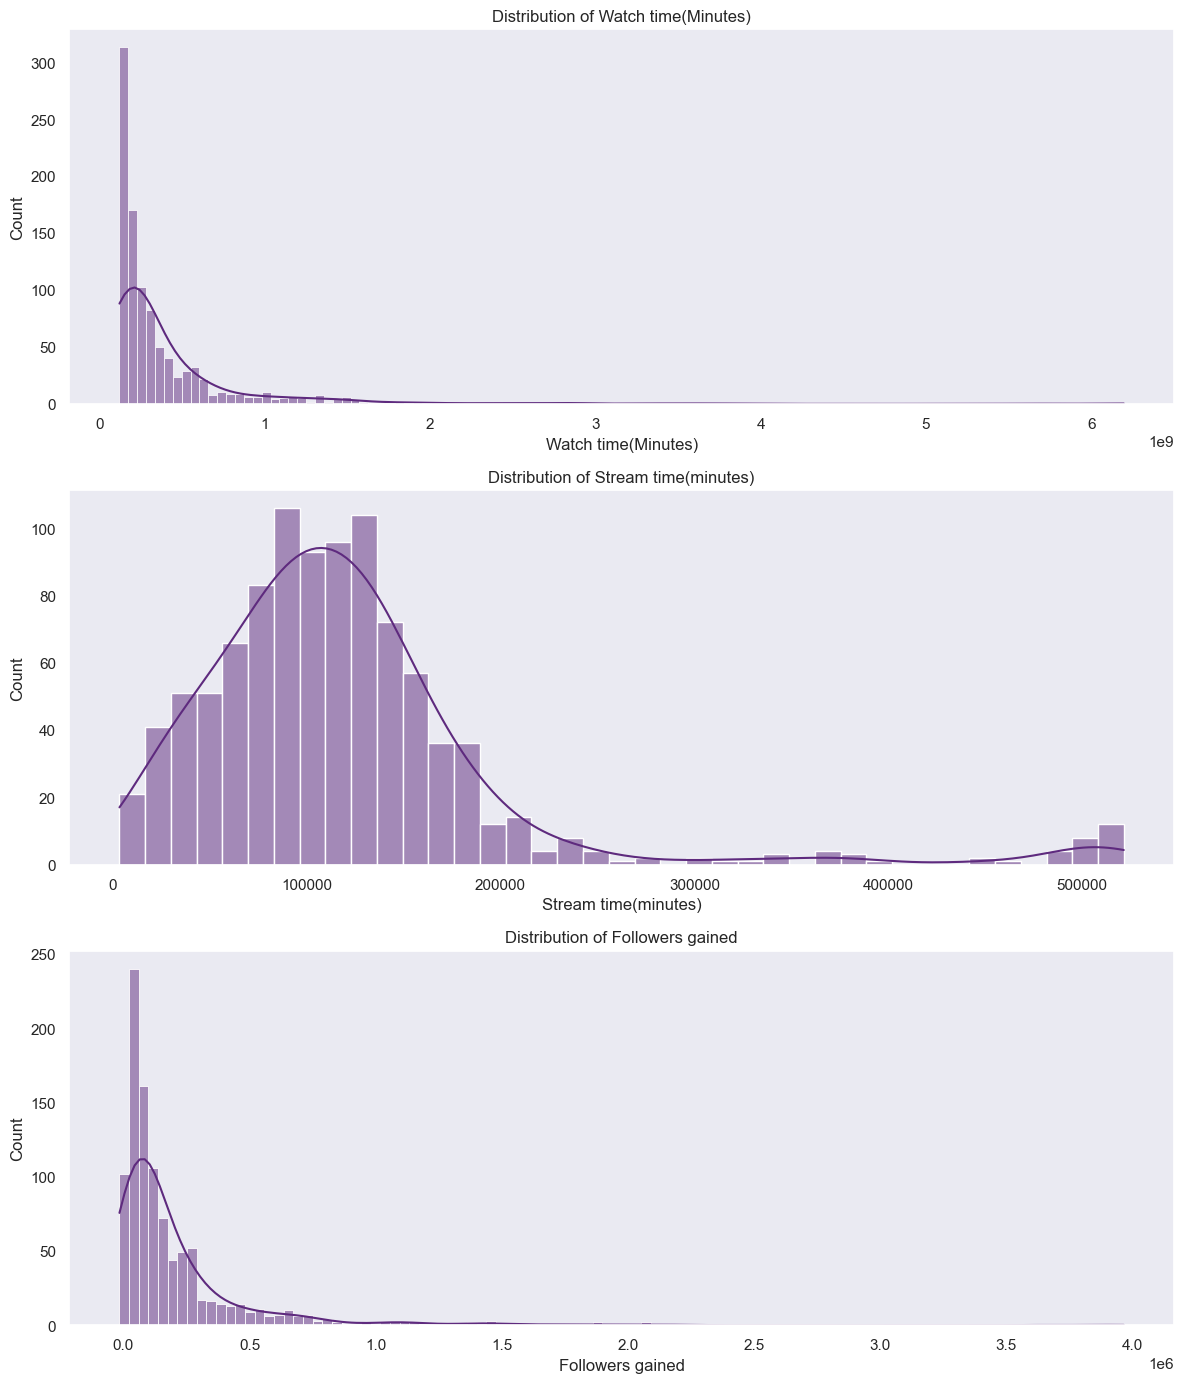

In [84]:
# Set up the matplotlib figure with 3 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# List of numerical columns
numerical_columns = ['Watch time(Minutes)', 'Stream time(minutes)', 'Followers gained']

# Iterate over the list of columns and create a histogram with KDE for each
for i, column in enumerate(numerical_columns):
    sns.histplot(twitch_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust the layout so plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()


In [63]:
%%jmd

## Viewer Engagement

1. Examining metrics such as `Average viewers` and `Peak viewers` to understand what levels of engagement are most common.


## Viewer Engagement

1. Examining metrics such as `Average viewers` and `Peak viewers` to understand what levels of engagement are most common.

In [64]:
%%jmd

**Distribution of Key Metrics Insights:**
    
- **Watch Time**: The distribution is heavily right-skewed, indicating most channels have lower watch times, with a few channels achieving exceptionally high watch times.

- **Stream Time**: While not as heavily skewed, the stream time is still a right-skewed distribution, suggesting that most channels have shorter stream times, with fewer channels streaming for longer durations.

- **Followers Gained**: This metric is also heavily right-skewed, showing most channels gain a smaller number of followers, with outliers achieving extraordinary growth.
    
   2. Investigating the relationship between `Stream time` and engagement metrics to see if longer streams correlate with higher viewership. 


**Distribution of Key Metrics Insights:**
    
- **Watch Time**: The distribution is heavily right-skewed, indicating most channels have lower watch times, with a few channels achieving exceptionally high watch times.

- **Stream Time**: While not as heavily skewed, the stream time is still a right-skewed distribution, suggesting that most channels have shorter stream times, with fewer channels streaming for longer durations.

- **Followers Gained**: This metric is also heavily right-skewed, showing most channels gain a smaller number of followers, with outliers achieving extraordinary growth.
    
   2. Investigating the relationship between `Stream time` and engagement metrics to see if longer streams correlate with higher viewership. 

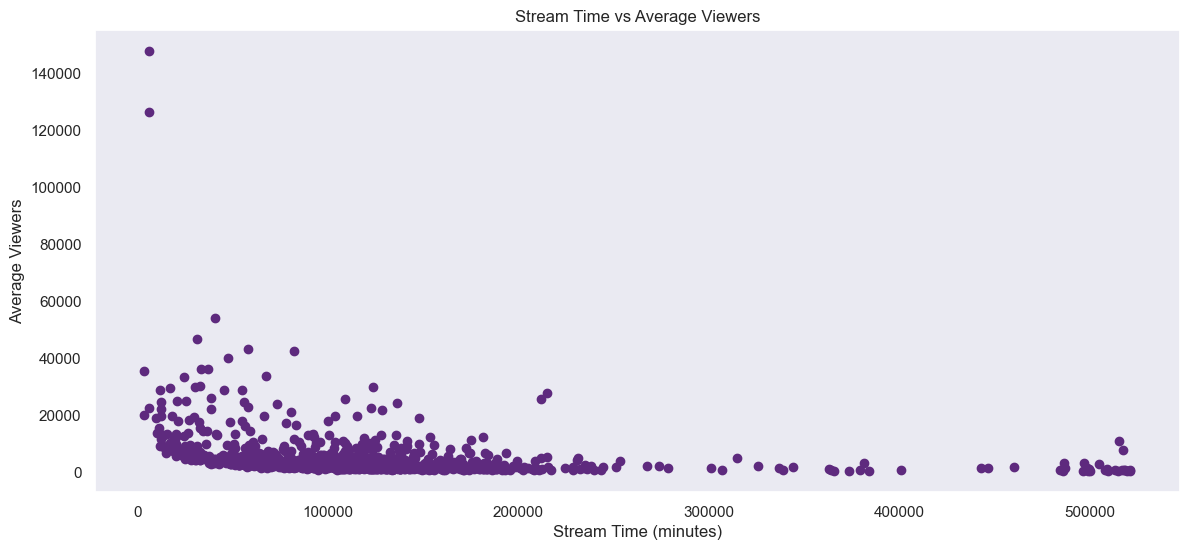

In [85]:
# Scatter plot for 'Stream time(minutes)' vs 'Average viewers'
plt.figure(figsize=(14, 6))
plt.scatter(twitch_data['Stream time(minutes)'], twitch_data['Average viewers'])
plt.title('Stream Time vs Average Viewers')
plt.xlabel('Stream Time (minutes)')
plt.ylabel('Average Viewers')
plt.show()

In [65]:
%%jmd

The scatter plot shows a visual representation of the relationship between how long channels stream and the number of average viewers they attract:

- **Trend Observation**: The plot does not show a clear linear relationship; channels with very high stream times do not necessarily have the highest average viewership.
- **Viewer Engagement**: Some channels with moderate streaming times achieve high average viewers, suggesting content and engagement quality may be more significant than streaming duration alone.


The scatter plot shows a visual representation of the relationship between how long channels stream and the number of average viewers they attract:

- **Trend Observation**: The plot does not show a clear linear relationship; channels with very high stream times do not necessarily have the highest average viewership.
- **Viewer Engagement**: Some channels with moderate streaming times achieve high average viewers, suggesting content and engagement quality may be more significant than streaming duration alone.

In [83]:
%%jmd

## Outlier Analysis

- Identifying outliers using visual methods like boxplots for all numerical variables.
- Deciding whether to keep these outliers.


## Outlier Analysis

- Identifying outliers using visual methods like boxplots for all numerical variables.
- Deciding whether to keep these outliers.

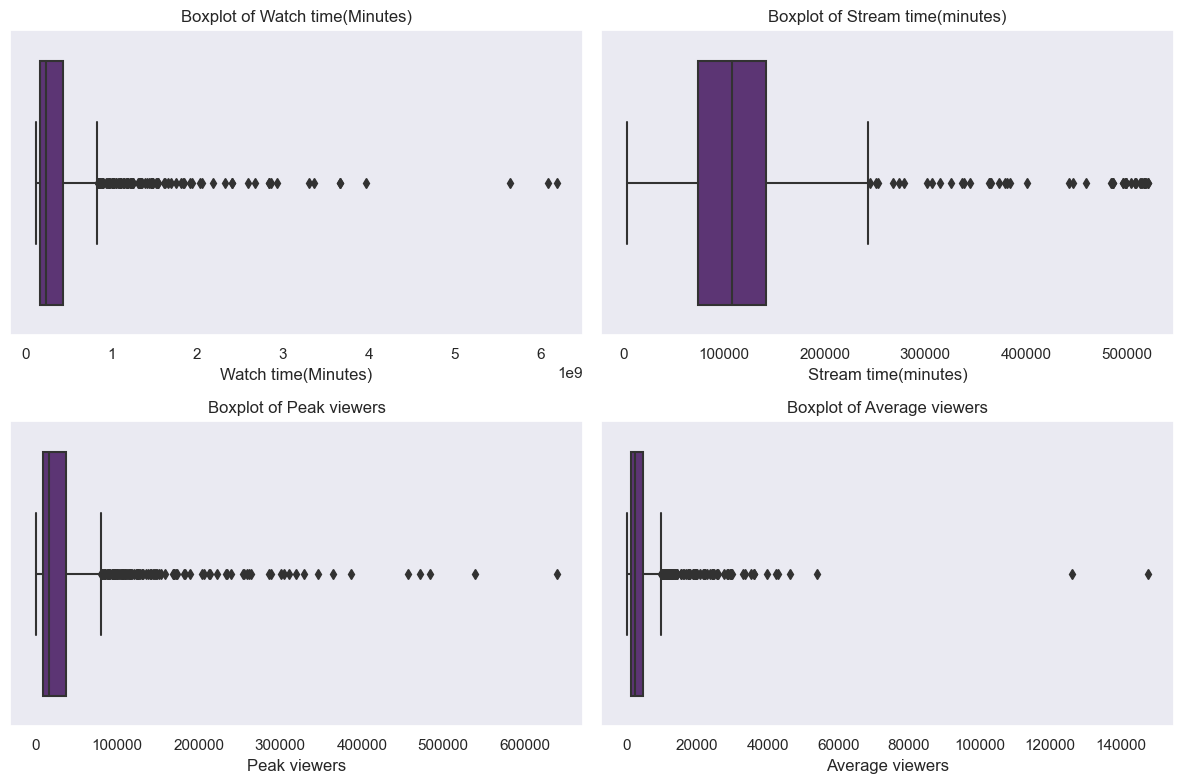

In [86]:

# Define the columns to plot
columns_to_plot = ['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers', 'Average viewers']

# Set up the matplotlib figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Iterate over the columns and create a boxplot for each, arranging them in the subplot grid
for i, column in enumerate(columns_to_plot):
    row, col = i // 2, i % 2
    sns.boxplot(x=twitch_data[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

# Adjust the layout so plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

In [69]:
%%jmd

The boxplots show the distribution and identify outliers in numerical values of the dataset:

- All metrics exhibit right-skewness, with the majority of data clustered toward the lower end and several outliers on the high end, indicating a small number of channels with exceptional performance on these metrics.
- `Watch time` and `Stream time` have long ranges, suggesting variability in how much content channels produce and how much viewers engage.
- Outliers in `Peak viewers` and `Average viewers` suggest events or streams that have attracted unusually high numbers of viewers.


The boxplots show the distribution and identify outliers in numerical values of the dataset:

- All metrics exhibit right-skewness, with the majority of data clustered toward the lower end and several outliers on the high end, indicating a small number of channels with exceptional performance on these metrics.
- `Watch time` and `Stream time` have long ranges, suggesting variability in how much content channels produce and how much viewers engage.
- Outliers in `Peak viewers` and `Average viewers` suggest events or streams that have attracted unusually high numbers of viewers.

In [85]:
%%jmd

## Correlation Analysis
Understanding relationships between variables influencing popularity:
- Using a correlation matrix and corresponding heatmap to identify strongly correlated variables.
- Using Scatter plots to help visualize the relationships between `Followers gained` and `Views gained`.


## Correlation Analysis
Understanding relationships between variables influencing popularity:
- Using a correlation matrix and corresponding heatmap to identify strongly correlated variables.
- Using Scatter plots to help visualize the relationships between `Followers gained` and `Views gained`.

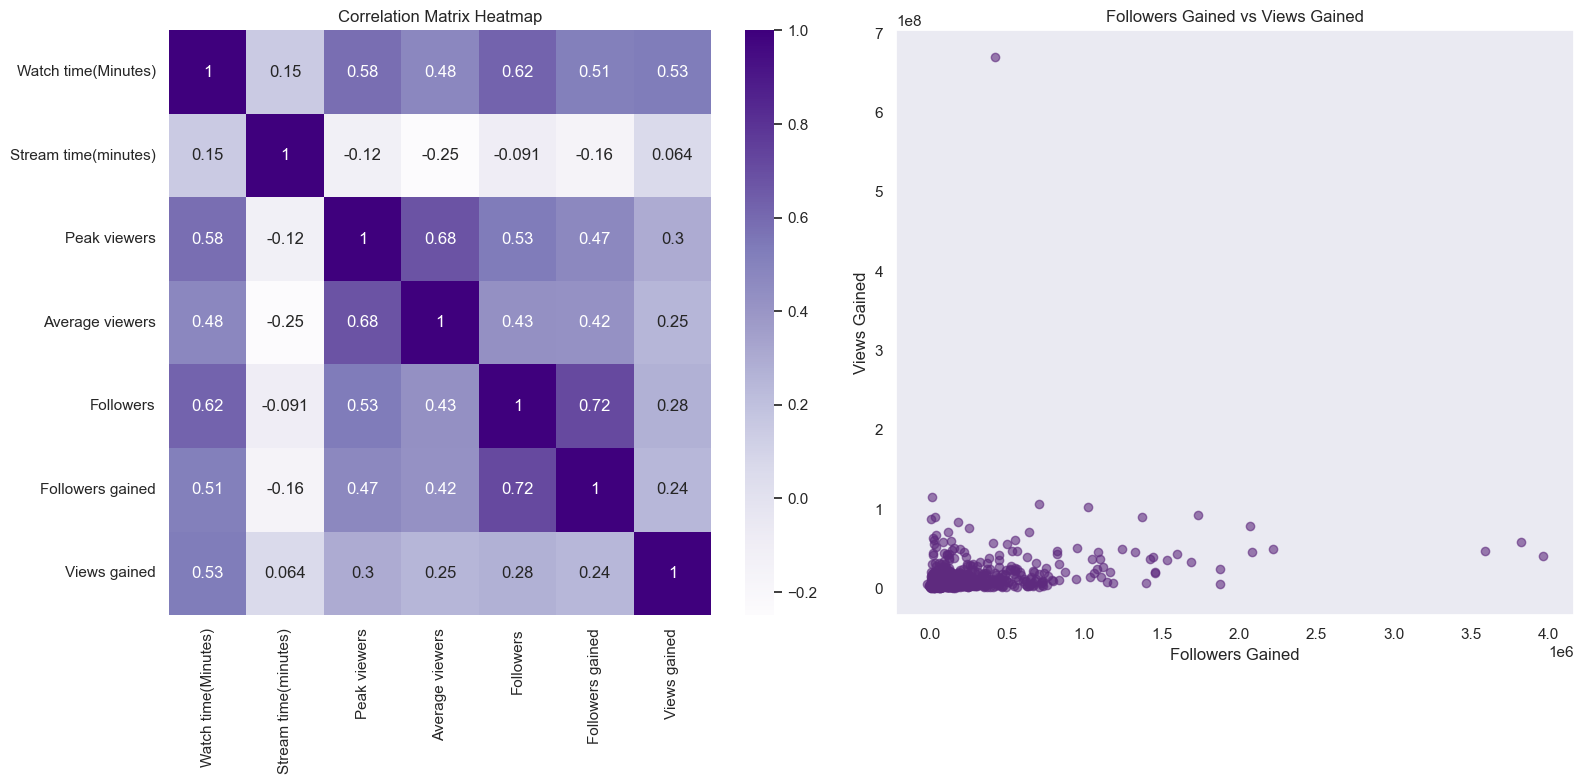

In [87]:

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Correlation matrix heatmap on the first subplot
numeric_columns = twitch_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', ax=ax1)
ax1.set_title('Correlation Matrix Heatmap')

# Scatter plot for 'Followers gained' vs 'Views gained' on the second subplot
# Ensure that both columns are numeric and do not contain inf/-inf values
twitch_data['Followers gained'] = pd.to_numeric(twitch_data['Followers gained'], errors='coerce').replace([np.inf, -np.inf], np.nan)
twitch_data['Views gained'] = pd.to_numeric(twitch_data['Views gained'], errors='coerce').replace([np.inf, -np.inf], np.nan)
ax2.scatter(twitch_data['Followers gained'], twitch_data['Views gained'], alpha=0.6, color='#5E2A7E')
ax2.set_title('Followers Gained vs Views Gained')
ax2.set_xlabel('Followers Gained')
ax2.set_ylabel('Views Gained')

# Adjust the layout
plt.tight_layout()
plt.show()

In [70]:
%%jmd

**Correlation Heat Map**
- **High Correlations**: There are notably strong correlations between `Watch time` and `Followers`, and `Followers gained` and `Followers`, suggesting that channels with higher watch times and existing followers tend to gain more followers.

- **Moderate Correlations**: `Peak viewers` and `Average viewers` show moderate correlation with 'Followers gained', indicating that channels that manage to attract more viewers at peak times or on average are more likely to see growth in their follower base.

- **Low Correlations**: `Stream time` has a surprisingly low correlation with other variables, implying that simply streaming for longer periods is not a strong predictor of gaining more followers or views.

**Scatter Plot**
- The scatter plot reveals that while there is a general positive trend between `Followers gained` and `Views gained`, there are channels with a high number of followers gained that don't have a high number of views gained, suggesting that follower count increases are not always matched by increases in viewership.


**Correlation Heat Map**
- **High Correlations**: There are notably strong correlations between `Watch time` and `Followers`, and `Followers gained` and `Followers`, suggesting that channels with higher watch times and existing followers tend to gain more followers.

- **Moderate Correlations**: `Peak viewers` and `Average viewers` show moderate correlation with 'Followers gained', indicating that channels that manage to attract more viewers at peak times or on average are more likely to see growth in their follower base.

- **Low Correlations**: `Stream time` has a surprisingly low correlation with other variables, implying that simply streaming for longer periods is not a strong predictor of gaining more followers or views.

**Scatter Plot**
- The scatter plot reveals that while there is a general positive trend between `Followers gained` and `Views gained`, there are channels with a high number of followers gained that don't have a high number of views gained, suggesting that follower count increases are not always matched by increases in viewership.

In [86]:
%%jmd

## Categorical Data Analysis
Analyzing the categorical data - `Partnered`, `Mature`, and `Language`:
- Using value counts to understand the distribution of these categories.
- Visualizing the counts with bar plots.



## Categorical Data Analysis
Analyzing the categorical data - `Partnered`, `Mature`, and `Language`:
- Using value counts to understand the distribution of these categories.
- Visualizing the counts with bar plots.

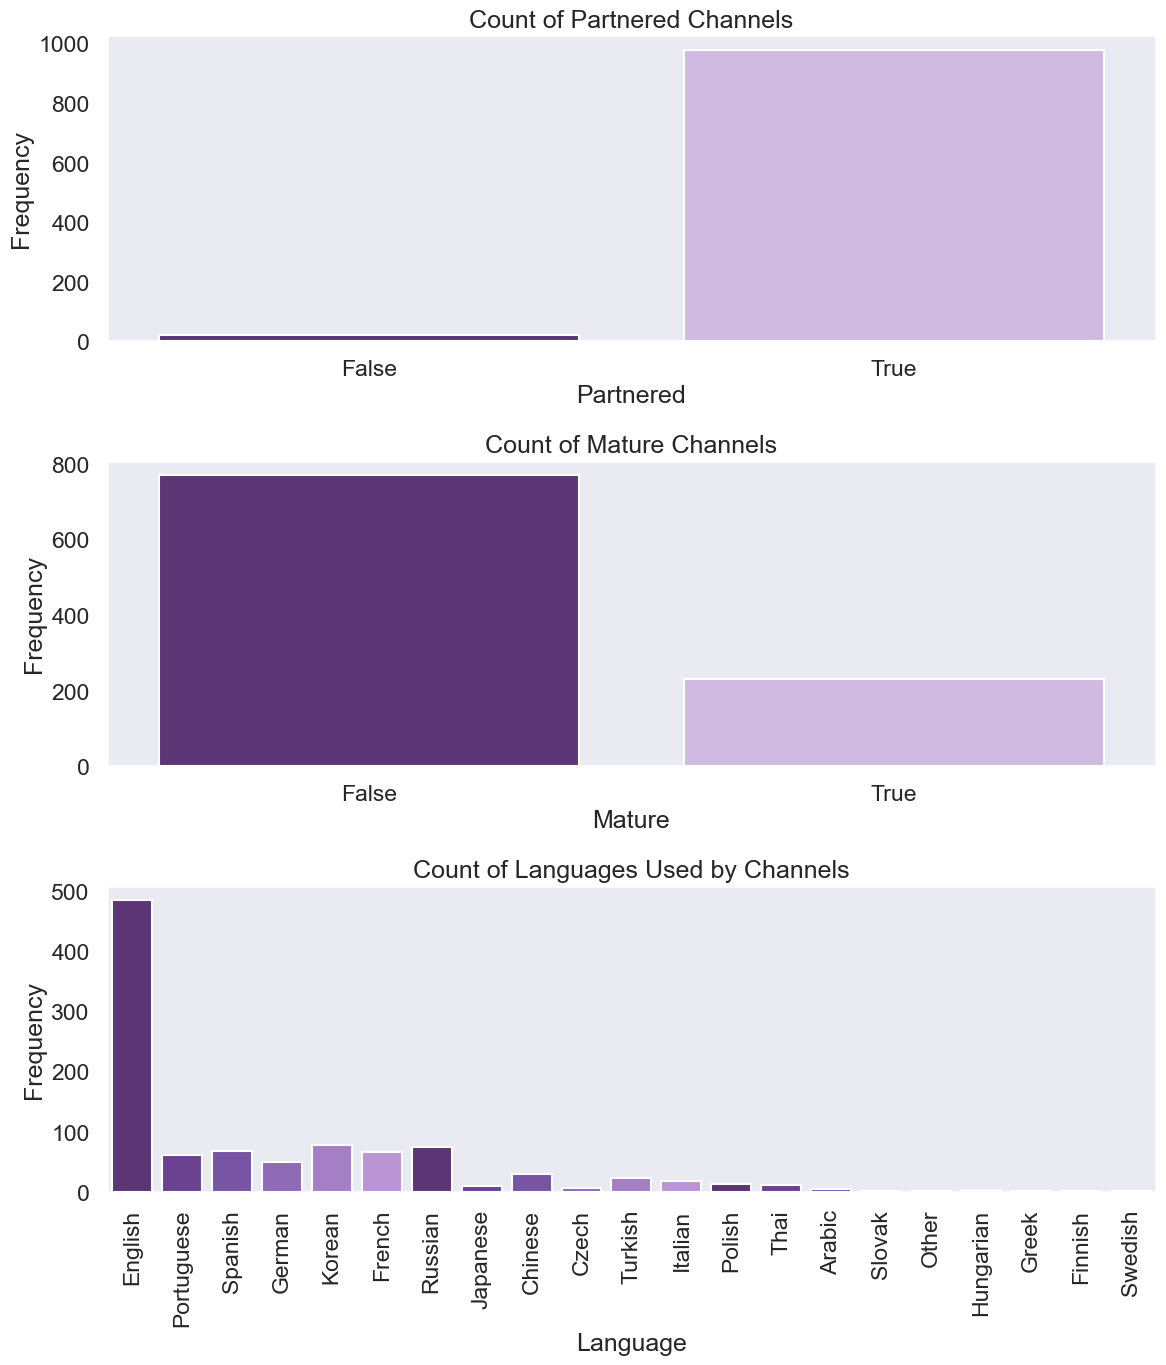

In [88]:

# Increase the font scale for better readability
sns.set_context("talk")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

# Plot 'Partnered' bar plot
sns.countplot(x='Partnered', data=twitch_data, palette=["#5E2A7E", "#D3B3E7"], ax=axes[0])
axes[0].set_title('Count of Partnered Channels')
axes[0].set_ylabel('Frequency')

# Plot 'Mature' bar plot
sns.countplot(x='Mature', data=twitch_data, palette=["#5E2A7E", "#D3B3E7"], ax=axes[1])
axes[1].set_title('Count of Mature Channels')
axes[1].set_ylabel('Frequency')

# Plot 'Language' bar plot
sns.countplot(x='Language', data=twitch_data, palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"], twitch_data['Language'].nunique()), ax=axes[2])
axes[2].set_title('Count of Languages Used by Channels')
axes[2].set_ylabel('Frequency')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x labels for better readability

# Adjust the layout
plt.tight_layout()
plt.show()


In [118]:
%%jmd

- **Partnered Channels**: The vast majority of channels are partnered. This skew is expected with the dataset containing the performance metrics of the top 1000 streamers. 

- **Mature Channels**: A smaller proportion of channels are designated as mature. This could indicate a platform trend or content strategy to attract a broader audience that includes younger viewers.

- **Language Distribution**: English is the dominant language used by channels, highlighting the platform's English-speaking audience focus. Other languages have a presence, but significantly less, which reflects the global reach of the platform and the potential for non-English streams to tap into niche markets.
    
___


- **Partnered Channels**: The vast majority of channels are partnered. This skew is expected with the dataset containing the performance metrics of the top 1000 streamers. 

- **Mature Channels**: A smaller proportion of channels are designated as mature. This could indicate a platform trend or content strategy to attract a broader audience that includes younger viewers.

- **Language Distribution**: English is the dominant language used by channels, highlighting the platform's English-speaking audience focus. Other languages have a presence, but significantly less, which reflects the global reach of the platform and the potential for non-English streams to tap into niche markets.
    
___

In [110]:
%%jmd

# Comparative Analysis of Partnered Vs. Non-Partnered Channels

This analysis will focus on the impact Twitch or Brand Partnership has on followers, views, and watch time - and whether a brand partnership is beneficial to a streamer's success.

## Top 50 Channels by Number of Followers
Comparing the number of followers between the top 50 Partnered Channels and Top 50 Not Partnered Channels. 


# Comparative Analysis of Partnered Vs. Non-Partnered Channels

This analysis will focus on the impact Twitch or Brand Partnership has on followers, views, and watch time - and whether a brand partnership is beneficial to a streamer's success.

## Top 50 Channels by Number of Followers
Comparing the number of followers between the top 50 Partnered Channels and Top 50 Not Partnered Channels. 

In [182]:
# Filter the dataset to include only rows where 'Partnered' is False
not_partnered_channels = twitch_data[twitch_data['Partnered'] == False]

# Sort the filtered dataset by 'Followers' column in descending order and select the top 50 rows
top_50_not_partnered = not_partnered_channels.sort_values(by='Followers', ascending=False).head(50)

In [183]:
# Filter the dataset to include only rows where 'Partnered' is True
partnered_channels = twitch_data[twitch_data['Partnered'] == True]

# Sort the filtered dataset by 'Followers' column in descending order and select the top 50 rows
top_50_partnered = partnered_channels.sort_values(by='Followers', ascending=False).head(50)

In [189]:
# Sort the non-partnered dataset by the "Following" column in descending order and select the top 50 rows
top_50_following = top_50_not_partnered.sort_values(by='Followers', ascending=False).head(50)

# Sort the partnered dataset by the "Following" column in descending order and select the top 50 rows
top_50_following_partnered = top_50_partnered.sort_values(by='Followers', ascending=False).head(50)

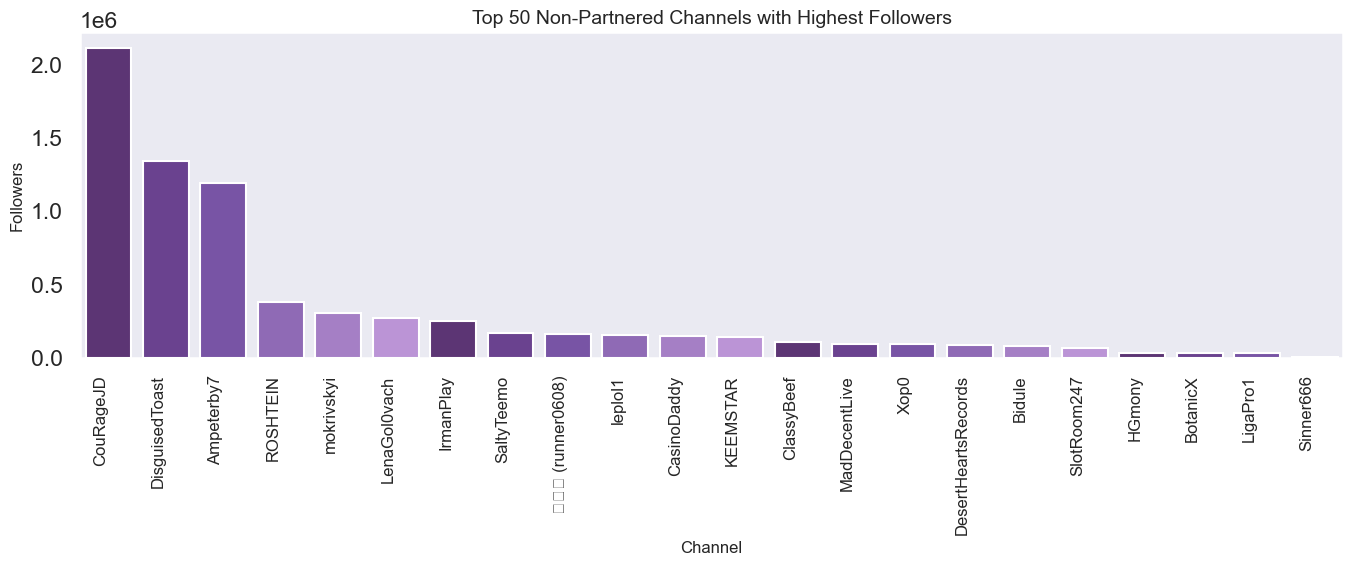

In [205]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel', y='Followers', palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"]), data=top_50_following)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Followers', fontsize=12)
plt.title('Top 50 Non-Partnered Channels with Highest Followers', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [223]:
# Select the top 3 non-partnered channels
top_5_non_partnered = top_50_following.head(5)

# View the top 3 non-partnered channels
top_5_non_partnered

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
924,CouRageJD,131341275,14010,72100,8717,2115596,120434,2874860,False,False,English
425,DisguisedToast,277695945,20325,38169,9892,1340283,192604,5928269,False,False,English
452,Ampeterby7,254852265,27480,43882,9301,1194476,1185647,6513197,False,False,Spanish
42,ROSHTEIN,1435735725,118995,45843,11717,381918,242369,17836875,False,True,English
800,mokrivskyi,154332060,27105,29983,5864,308815,304008,8255635,False,False,Russian


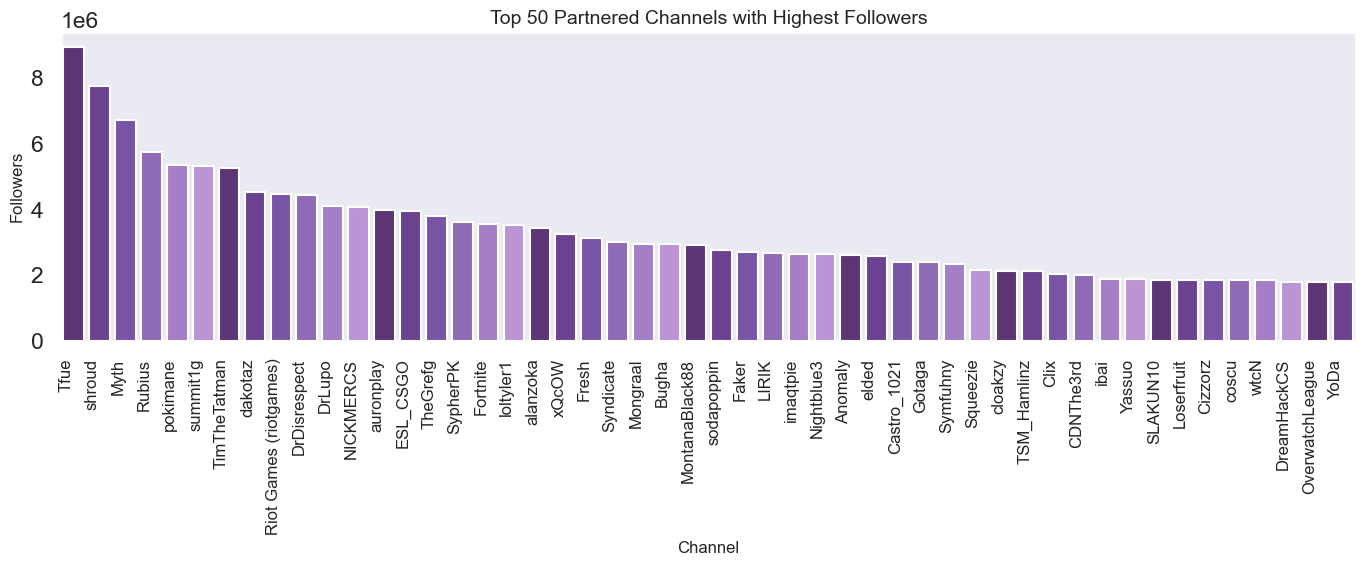

In [206]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel', y='Followers', palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"]), data=top_50_following_partnered)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Followers', fontsize=12)
plt.title('Top 50 Partnered Channels with Highest Followers', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [222]:
# Select the top 3 non-partnered channels
top_5_partnered = top_50_following_partnered.head(5)

# View the top 3 non-partnered channels
top_5_partnered

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English
35,Myth,1479214575,134760,122552,9396,6726893,1421811,37384058,True,False,English
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English


In [246]:
%%jmd

#### **Partnership Impact on Follower Count:**
    
* Partnered streamers have notably higher followers.
* **Followers Threshold**: No non-partnered streamer surpasses 5 million followers, while all partnered ones do.
* **Total Followers**: Combined followers for partnered streamers is significantly higher than non-partnered.
* **Followers Gained**: Partnered streamers show a greater increase in followers over time compared to non-partnered streamers.
    
## Top 50 Channels by Average Viewers
Comparing average viewership between Partner vs Non-Partner Streamers.


#### **Partnership Impact on Follower Count:**
    
* Partnered streamers have notably higher followers.
* **Followers Threshold**: No non-partnered streamer surpasses 5 million followers, while all partnered ones do.
* **Total Followers**: Combined followers for partnered streamers is significantly higher than non-partnered.
* **Followers Gained**: Partnered streamers show a greater increase in followers over time compared to non-partnered streamers.
    
## Top 50 Channels by Average Viewers
Comparing average viewership between Partner vs Non-Partner Streamers.

In [216]:
# Filter the dataset to include only rows where 'Partnered' is False
not_partnered_channels = twitch_data[twitch_data['Partnered'] == False]

# Sort the filtered dataset by 'Average viewers' column in descending order and select the top 50 rows
top_50_not_partnered = not_partnered_channels.sort_values(by='Average viewers', ascending=False).head(50)

In [218]:
# Filter the dataset to include only rows where 'Partnered' is True
partnered_channels = twitch_data[twitch_data['Partnered'] == True]

# Sort the filtered dataset by 'Average viewers' column in descending order and select the top 50 rows
top_50_partnered = partnered_channels.sort_values(by='Average viewers', ascending=False).head(50)

In [219]:
# Sort the non-partnered dataset by the "Following" column in descending order and select the top 50 rows
top_50_avgviewers = top_50_not_partnered.sort_values(by='Average viewers', ascending=False).head(50)

# Sort the partnered dataset by the "Following" column in descending order and select the top 50 rows
top_50_avgviewers_partnered = top_50_partnered.sort_values(by='Average viewers', ascending=False).head(50)

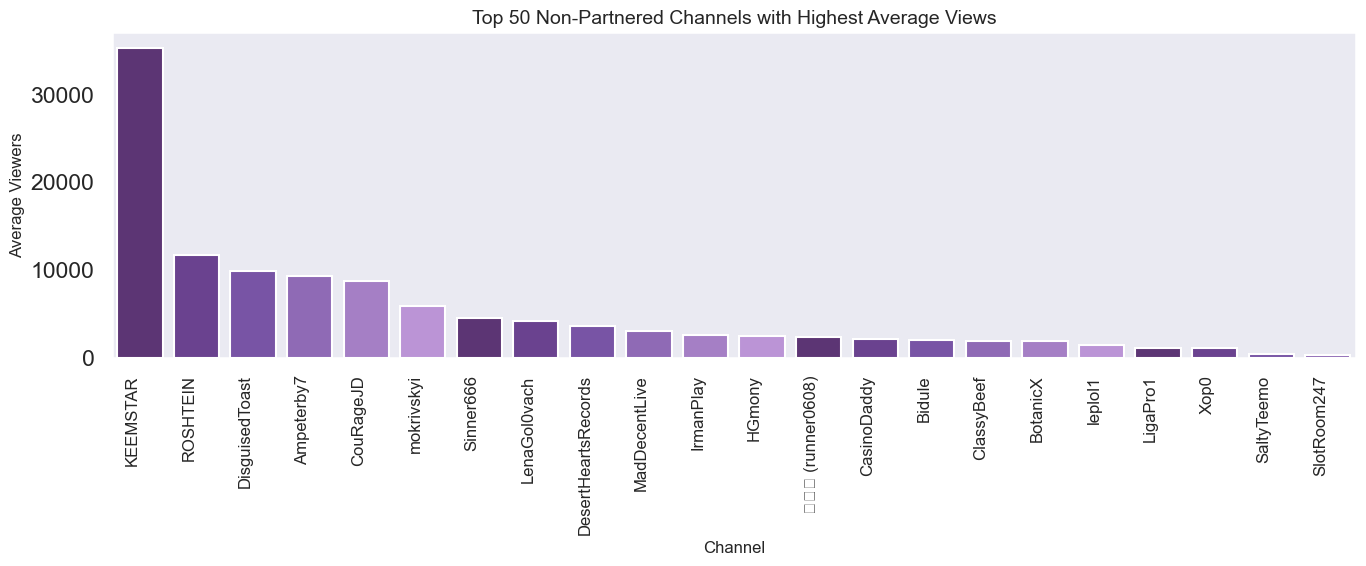

In [220]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel', y='Average viewers', palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"]), data=top_50_avgviewers)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Viewers', fontsize=12)
plt.title('Top 50 Non-Partnered Channels with Highest Average Views', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [224]:
# Select the top 3 non-partnered channels
top_5_non_partnered = top_50_avgviewers.head(5)

# View the top 3 non-partnered channels
top_5_non_partnered

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
990,KEEMSTAR,123365895,3465,74195,35333,146035,46367,7139253,False,False,English
42,ROSHTEIN,1435735725,118995,45843,11717,381918,242369,17836875,False,True,English
425,DisguisedToast,277695945,20325,38169,9892,1340283,192604,5928269,False,False,English
452,Ampeterby7,254852265,27480,43882,9301,1194476,1185647,6513197,False,False,Spanish
924,CouRageJD,131341275,14010,72100,8717,2115596,120434,2874860,False,False,English


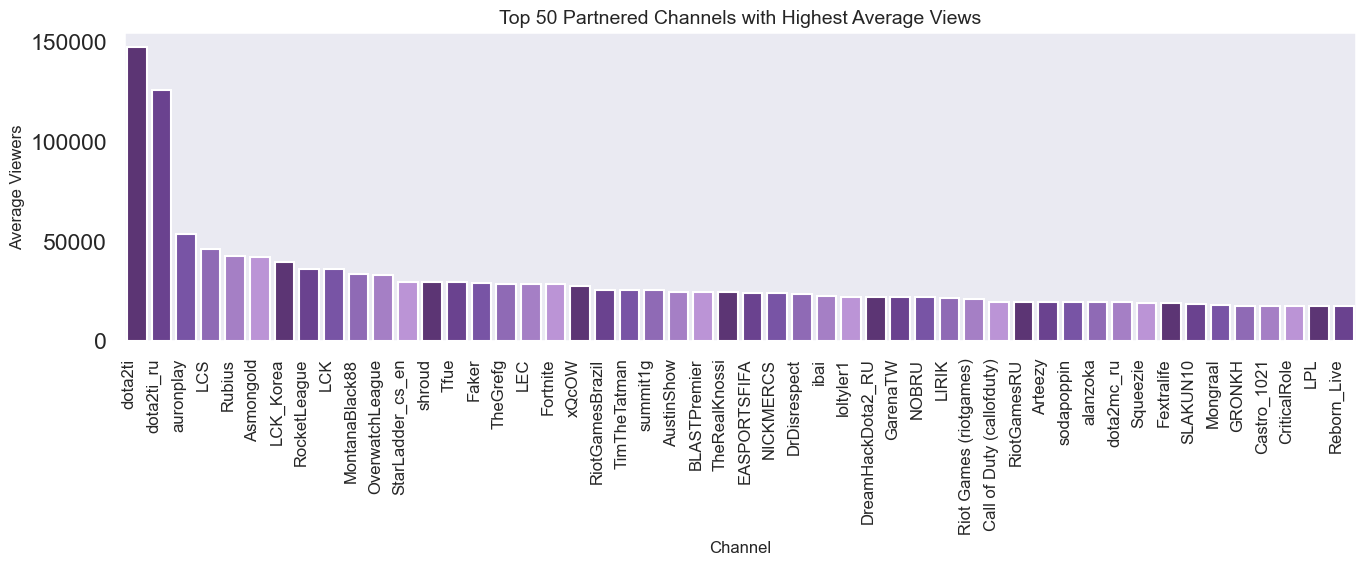

In [221]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel', y='Average viewers', palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"]), data=top_50_avgviewers_partnered)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Viewers', fontsize=12)
plt.title('Top 50 Partnered Channels with Highest Average Views', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [225]:
# Select the top 3 non-partnered channels
top_5_partnered = top_50_avgviewers_partnered.head(5)

# View the top 3 non-partnered channels
top_5_partnered

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English
109,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
41,LCS,1461310140,31125,214124,46459,1162746,526244,28313058,True,False,English
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish


In [247]:
%%jmd

#### **Partnership Impact on Average Viewers:**

* **Highest Average Viewers:** The data shows that partnered channels have a higher peak in average viewers compared to non-partnered channels.
* **Viewer Engagement:** There is a clear gap in engagement, with partnered channels achieving greater average viewership numbers, implying a stronger or more consistent viewer base.
* **Top Channel Comparison:** The top non-partnered channel's average viewership is significantly lower than the top partnered channel's, suggesting partnership status may play a role in attracting and maintaining viewers.
    
## Top 50 Channels by Watch Time
Comparing the length of times viewers watch Partner vs Non-Partner Streamers.


#### **Partnership Impact on Average Viewers:**

* **Highest Average Viewers:** The data shows that partnered channels have a higher peak in average viewers compared to non-partnered channels.
* **Viewer Engagement:** There is a clear gap in engagement, with partnered channels achieving greater average viewership numbers, implying a stronger or more consistent viewer base.
* **Top Channel Comparison:** The top non-partnered channel's average viewership is significantly lower than the top partnered channel's, suggesting partnership status may play a role in attracting and maintaining viewers.
    
## Top 50 Channels by Watch Time
Comparing the length of times viewers watch Partner vs Non-Partner Streamers.

In [236]:
# Filter the dataset to include only rows where 'Partnered' is False
not_partnered_channels = twitch_data[twitch_data['Partnered'] == False]

# Sort the filtered dataset by 'Average viewers' column in descending order and select the top 50 rows
top_50_not_partnered = not_partnered_channels.sort_values(by='Watch time(Minutes)', ascending=False).head(50)

In [237]:
# Filter the dataset to include only rows where 'Partnered' is True
partnered_channels = twitch_data[twitch_data['Partnered'] == True]

# Sort the filtered dataset by 'Average viewers' column in descending order and select the top 50 rows
top_50_partnered = partnered_channels.sort_values(by='Watch time(Minutes)', ascending=False).head(50)

In [238]:
# Sort the non-partnered dataset by the "Following" column in descending order and select the top 50 rows
top_50_watchtimes = top_50_not_partnered.sort_values(by='Watch time(Minutes)', ascending=False).head(50)

# Sort the partnered dataset by the "Following" column in descending order and select the top 50 rows
top_50_watchtimes_partnered = top_50_partnered.sort_values(by='Watch time(Minutes)', ascending=False).head(50)

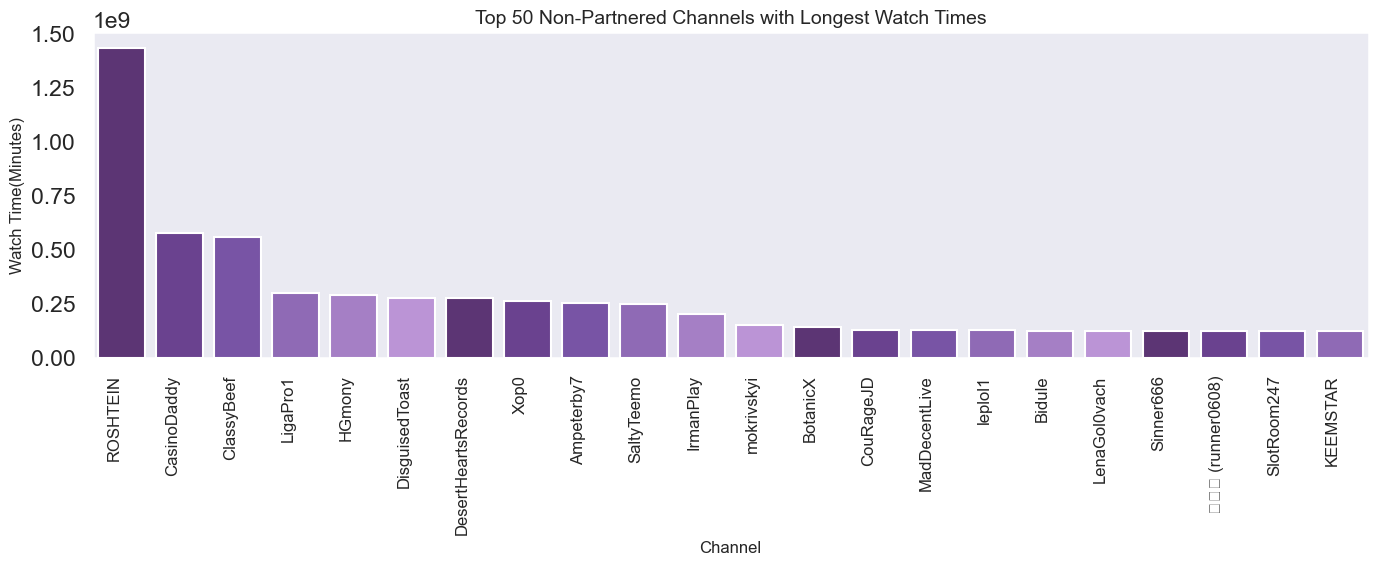

In [240]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel', y='Watch time(Minutes)', palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"]), data=top_50_watchtimes)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Watch Time(Minutes)', fontsize=12)
plt.title('Top 50 Non-Partnered Channels with Longest Watch Times', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [243]:
# Select the top 3 non-partnered channels
top_5_non_partnered = top_50_watchtimes.head(5)

# View the top 3 non-partnered channels
top_5_non_partnered

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
42,ROSHTEIN,1435735725,118995,45843,11717,381918,242369,17836875,False,True,English
172,CasinoDaddy,577240710,267465,6524,2168,151098,42680,7493491,False,True,English
181,ClassyBeef,558883590,273660,33624,1941,108623,88671,6626543,False,True,English
383,LigaPro1,298828170,232620,11533,1149,30986,29434,60922719,False,False,Other
399,HGmony,290461620,111360,21999,2465,34358,32326,90310969,False,False,Russian


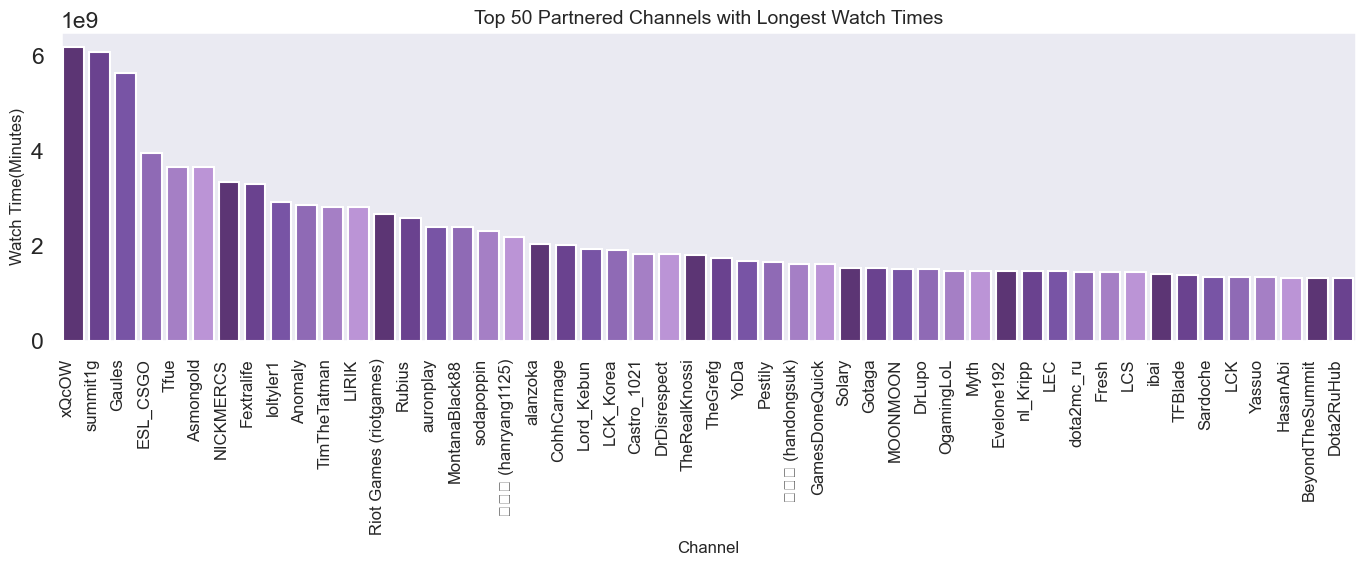

In [241]:
# Create a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel', y='Watch time(Minutes)', palette=sns.color_palette(["#5E2A7E", "#6A359C", "#7747B2", "#8F5DC1", "#A673D1", "#BD89E1"]), data=top_50_watchtimes_partnered)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Watch Time(Minutes)', fontsize=12)
plt.title('Top 50 Partnered Channels with Longest Watch Times', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


In [244]:
# Select the top 3 non-partnered channels
top_5_partnered = top_50_watchtimes_partnered.head(5)

# View the top 3 non-partnered channels
top_5_partnered

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [248]:
%%jmd

#### **Partnership Impact on Watch Times:**

- **Watch Time Disparity**: The total watch time for the top 5 partnered channels vastly exceeds that of the top 5 non-partnered channels, indicating a higher level of viewer commitment and possibly content availability.

- **Top Channels**: The leading channel among partnered streamers has a watch time almost 4x that of the top non-partnered channel, showcasing a significant gap in content consumption.

- **Partnership Impact**: Partnership status may be contributing to a longer durations in watch time, possibly due to increased visibility and platform support.



#### **Partnership Impact on Watch Times:**

- **Watch Time Disparity**: The total watch time for the top 5 partnered channels vastly exceeds that of the top 5 non-partnered channels, indicating a higher level of viewer commitment and possibly content availability.

- **Top Channels**: The leading channel among partnered streamers has a watch time almost 4x that of the top non-partnered channel, showcasing a significant gap in content consumption.

- **Partnership Impact**: Partnership status may be contributing to a longer durations in watch time, possibly due to increased visibility and platform support.

In [254]:
%%jmd

## Partnered Vs. Non-Partnered Impact

- **Followers**: Partnered channels have a higher follower count, implying a strong correlation between partnership status and the ability to attract and maintain a larger audience.

- **Average Viewers**: Partnered channels also exhibit higher average viewership. This suggests that not only do they attract more followers, but they also maintain higher concurrent viewership, indicating more active and engaged audiences.

- **Watch Times**: The total watch time for partnered channels is significantly greater than for non-partnered channels. Partnered channels seem to have a more consistent viewership over longer periods, pointing towards a more loyal or engaged viewer base.

In conclusion, partnership status on the platform appears to have a huge impact on key engagement metrics. Partnered channels benefit from higher follower counts, greater average viewers, and longer watch times, suggesting that partnership provides advantages that likely contribute to greater visibility, more consistent engagement, and potentially prioritization in platform algorithms.

### Brand Partnerships on Channel Ranking

The two features most indicative of channel ranking appear to be:

1. **Followers**: A higher follower count is a fundamental indicator of a channel's popularity and its ability to attract and retain a large audience over time.

2. **Average Viewers**: A higher average viewership reflects the channel's capacity to engage viewers and maintain their attention during streams, which is critical for sustaining high visibility and ranking on the platform.

While watch times are important for understanding engagement depth and viewer loyalty, followers and average viewers are more immediate indicators of a channel's ranking and popularity.

____


## Partnered Vs. Non-Partnered Impact

- **Followers**: Partnered channels have a higher follower count, implying a strong correlation between partnership status and the ability to attract and maintain a larger audience.

- **Average Viewers**: Partnered channels also exhibit higher average viewership. This suggests that not only do they attract more followers, but they also maintain higher concurrent viewership, indicating more active and engaged audiences.

- **Watch Times**: The total watch time for partnered channels is significantly greater than for non-partnered channels. Partnered channels seem to have a more consistent viewership over longer periods, pointing towards a more loyal or engaged viewer base.

In conclusion, partnership status on the platform appears to have a huge impact on key engagement metrics. Partnered channels benefit from higher follower counts, greater average viewers, and longer watch times, suggesting that partnership provides advantages that likely contribute to greater visibility, more consistent engagement, and potentially prioritization in platform algorithms.

### Brand Partnerships on Channel Ranking

The two features most indicative of channel ranking appear to be:

1. **Followers**: A higher follower count is a fundamental indicator of a channel's popularity and its ability to attract and retain a large audience over time.

2. **Average Viewers**: A higher average viewership reflects the channel's capacity to engage viewers and maintain their attention during streams, which is critical for sustaining high visibility and ranking on the platform.

While watch times are important for understanding engagement depth and viewer loyalty, followers and average viewers are more immediate indicators of a channel's ranking and popularity.

____

In [111]:
%%jmd

# Determining the Top 10 Channels Based On Viewer Trends
With viewer trends being the most influencial factors channel success, we'll determine the Top 10 Streamers/Channels through viewer categories within the dataset.


# Determining the Top 10 Channels Based On Viewer Trends
With viewer trends being the most influencial factors channel success, we'll determine the Top 10 Streamers/Channels through viewer categories within the dataset.

In [37]:
# Sorting the data to find the top 50 channels based on 'Followers' and 'Average viewers'
top_50_channels = twitch_data.sort_values(by=['Followers', 'Average viewers'], ascending=[False, False]).head(50)

In [42]:
# Convert 'Watch time(minutes)' to 'Watch time(hours)' for the plot
top_50_channels['Watch time(hours)'] = top_50_channels['Watch time(Minutes)'] / 60

In [43]:
# Convert 'Stream time(minutes)' to 'Strean time(hours)' for the plot
top_50_channels['Stream time(hours)'] = top_50_channels['Stream time(minutes)'] / 60

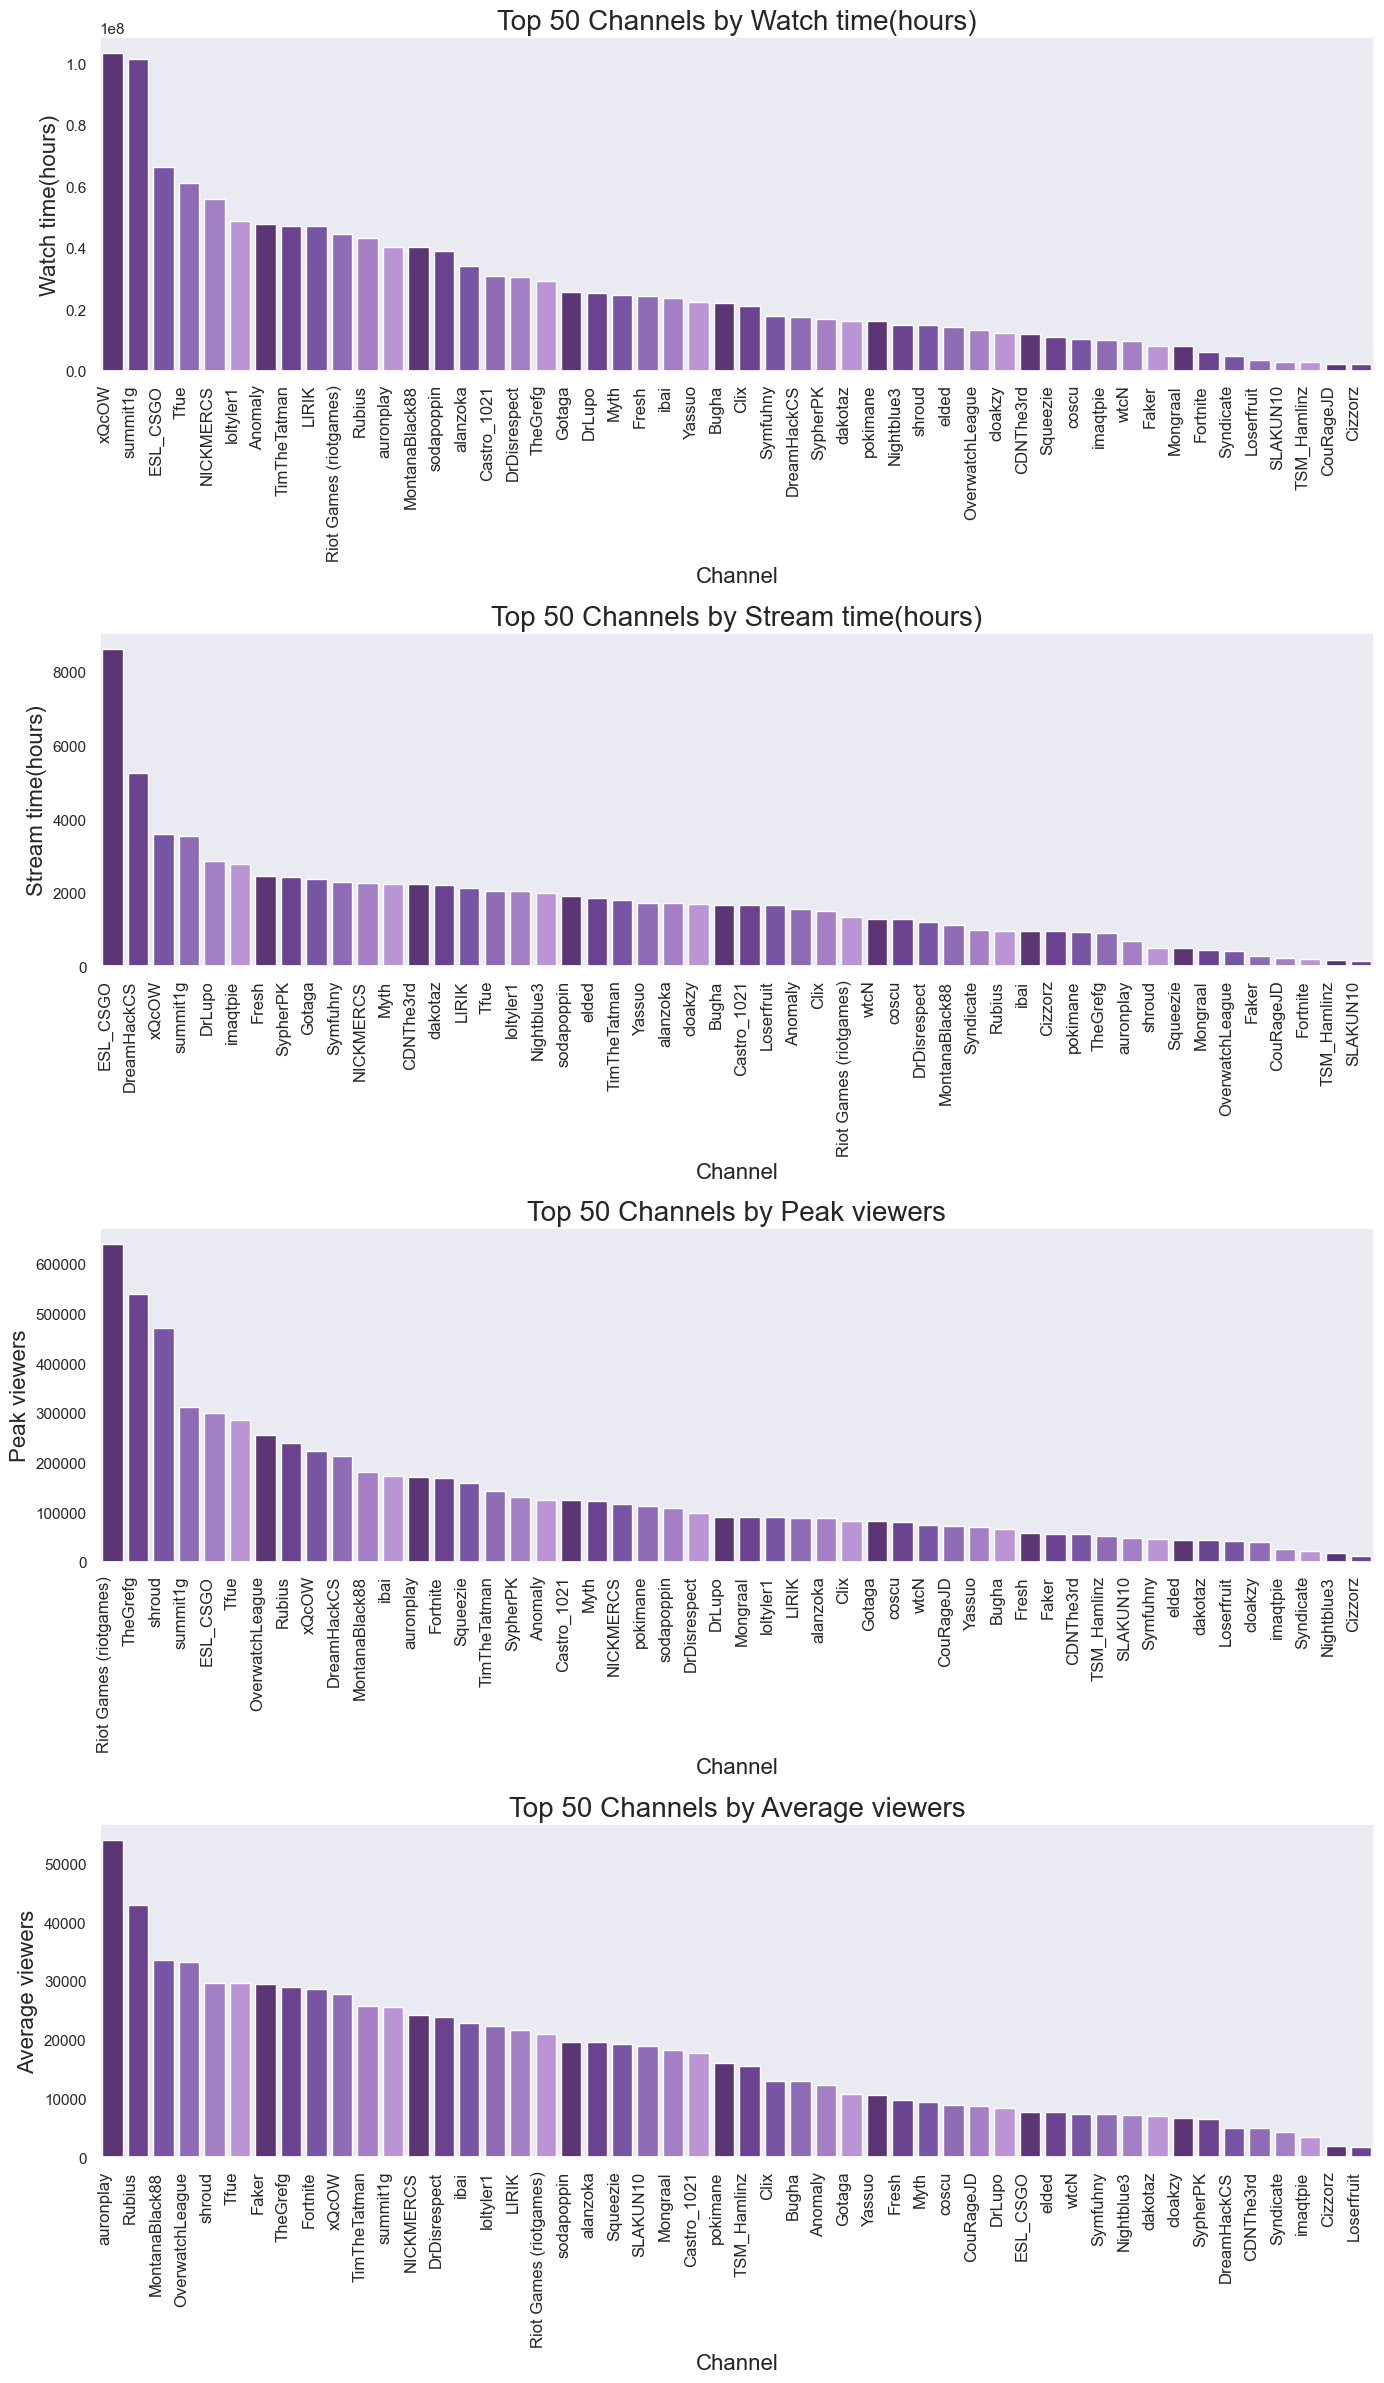

In [115]:
# Function to create individual bar plots, with readable fonts
def create_bar_plot(x_name, y_name, dataframe, ax):
    top_50_data = dataframe.nlargest(50, y_name).copy()
    order = top_50_data.sort_values(y_name, ascending=False)[x_name]
    sns.barplot(x=x_name, y=y_name, palette=dark_purple_palette, data=top_50_data, order=order, ax=ax)
    ax.set_title(f'Top 50 Channels by {y_name}', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=12)
    ax.set_xlabel(x_name, fontsize=16)
    ax.set_ylabel(y_name, fontsize=16)

# Set the overall aesthetics to use the dark purple palette
sns.set_theme(style='dark', palette=dark_purple_palette)

# Create a 4x1 subplot with larger figure size for readability
fig, axes = plt.subplots(4, 1, figsize=(14, 6 * 4)) # Adjust the height as needed

# Create each bar plot
create_bar_plot('Channel', 'Watch time(hours)', top_50_channels.copy(), axes[0])
create_bar_plot('Channel', 'Stream time(hours)', top_50_channels.copy(), axes[1])
create_bar_plot('Channel', 'Peak viewers', top_50_channels.copy(), axes[2])
create_bar_plot('Channel', 'Average viewers', top_50_channels.copy(), axes[3])

plt.tight_layout()
plt.show()


In [89]:
# Get the top 30 channels for each category
top_watch_time = top_50_channels.nlargest(30, 'Watch time(hours)')['Channel']
top_stream_time = top_50_channels.nlargest(30, 'Stream time(hours)')['Channel']
top_peak_viewers = top_50_channels.nlargest(30, 'Peak viewers')['Channel']
top_average_viewers = top_50_channels.nlargest(30, 'Average viewers')['Channel']


# Find the common channels across all categories
common_channels = set(top_watch_time) & set(top_stream_time) & set(top_peak_viewers) & set(top_average_viewers)

# If there are more than 10 common channels, select only the top 10 based on 'Followers'
if len(common_channels) > 10:
    # Create a DataFrame just with the common channels
    common_channels_df = top_50_channels[top_50_channels['Channel'].isin(common_channels)]
    # Sort by 'Followers' to get the most followed channels
    top_10_common_channels = common_channels_df.nlargest(10, 'Followers')['Channel'].tolist()
else:
    top_10_common_channels = list(common_channels)


In [95]:
top_50_channels[top_50_channels['Channel'].isin(['Tfue', 'summit1g', 'TimTheTatman', 'riotgames', 'NICKMERCS', 'loltyler1', 'alanzoka', 'xQcOW', 'sodapoppin', 'LIRIK'])]


,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Watch time(hours),Stream time(hours)
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English,6.118333e+07,2061.00
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English,1.015280e+08,3530.75
10,TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English,4.724062e+07,1813.00
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English,5.601125e+07,2271.25
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English,4.880595e+07,2041.50
18,alanzoka,2055003870,103770,89153,19560,3445134,1325075,46515698,True,False,Portuguese,3.425006e+07,1729.50
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English,1.032694e+08,3587.50
16,sodapoppin,2329440420,115305,107833,19659,2786162,236169,39334821,True,True,English,3.882401e+07,1921.75
11,LIRIK,2832930285,128490,89170,21739,2666382,199077,50504526,True,False,English,4.721550e+07,2141.50


In [112]:
%%jmd

## Conclusions
We can see that no streamer/channel dominates every single category but a specific group of streamers appear consistently at the top of all charts.
There are several key factors these channels all have in common with one another:   
- All of the channels are partnered.
- Only 2/10 channels are rated 'Mature', indicating that more age-inclusive content has a strong influence on channel popularity.
- 9/10 channels use English as the standard language in its streams. 


**The Top 10 Streamers Across All Viewing Categories Ordered by Follower Counts**:
    
 1. Tfue 
 2. summit1g
 3. TimTheTatman
 4. Riot Games (riotgames)
 5. NICKMERCS
 6. loltyler1
 7. alanzoka
 8. xQcOW
 9. sodapoppin
 10. LIRIK   
    


____

# Acknowledgments & References

* The data is a public dataset made available through [**Kaggle**](https://www.kaggle.com/datasets/aayushmishra1512/twitchdata) 
* The dataset is under [**this license**](https://creativecommons.org/publicdomain/zero/1.0/).
                                                                         
___


## Contact Information

- Email: [phelpsbp@gmail.com](mailto:phelpsbp@gmail.com)
- LinkedIn: [Brittany Phelps](https://www.linkedin.com/in/brittany-everette/)
- Github: [phelpsbp](https://github.com/phelpsbp)

I'm usually available for a chat on weekdays from 9 AM to 5 PM. Looking forward to hearing from you!


## Conclusions
We can see that no streamer/channel dominates every single category but a specific group of streamers appear consistently at the top of all charts.
There are several key factors these channels all have in common with one another:   
- All of the channels are partnered.
- Only 2/10 channels are rated 'Mature', indicating that more age-inclusive content has a strong influence on channel popularity.
- 9/10 channels use English as the standard language in its streams. 


**The Top 10 Streamers Across All Viewing Categories Ordered by Follower Counts**:
    
 1. Tfue 
 2. summit1g
 3. TimTheTatman
 4. Riot Games (riotgames)
 5. NICKMERCS
 6. loltyler1
 7. alanzoka
 8. xQcOW
 9. sodapoppin
 10. LIRIK   
    


____

# Acknowledgments & References

* The data is a public dataset made available through [**Kaggle**](https://www.kaggle.com/datasets/aayushmishra1512/twitchdata) 
* The dataset is under [**this license**](https://creativecommons.org/publicdomain/zero/1.0/).
                                                                         
___


## Contact Information

- Email: [phelpsbp@gmail.com](mailto:phelpsbp@gmail.com)
- LinkedIn: [Brittany Phelps](https://www.linkedin.com/in/brittany-everette/)
- Github: [phelpsbp](https://github.com/phelpsbp)

I'm usually available for a chat on weekdays from 9 AM to 5 PM. Looking forward to hearing from you!

In [129]:
!jupyter nbconvert --to html --template pj --embed-images "Twitch Streamer Analysis.ipynb"

[NbConvertApp] Converting notebook Twitch Streamer Analysis.ipynb to html
[NbConvertApp] Writing 7539210 bytes to Twitch Streamer Analysis.html
